In [4]:
# !pip install pingouin

In [22]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy import stats

import category_encoders as ce

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

from scipy.stats import mannwhitneyu

import pingouin as pg

from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score, plot_confusion_matrix, plot_roc_curve, roc_curve



In [58]:
df = pd.read_csv('data/Data/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   fare         891 non-null    float64
 9   embarked     889 non-null    object 
 10  title        891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [59]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Hart, Mr. Benjamin",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [60]:
# numerical data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [61]:
# categorical data
df.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hart, Mr. Benjamin",male,1601,B96 B98,S
freq,1,577,7,4,644


In [62]:
# checking missing values
df.isna().sum()/len(df)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

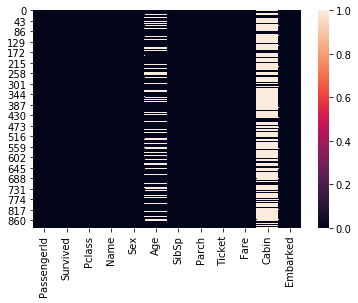

In [63]:
# checking missing values with heatmap
sns.heatmap(df.isna())
plt.show()

In [64]:
# lowering case columns name
df.columns = df.columns.str.lower()

In [65]:
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

## Cabin
check feature that has missing values

In [66]:
df['cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

**Note:** karena kolom `cabin` tidak memiliki pola sama sekali. Dan kolom 'cabin' juga memiliki `nan` valus yang cukup banyak, maka diputuskan untuk menghapus kolom `cabin`

In [67]:
df.drop('cabin', axis=1, inplace=True)

## Age
check feature that has missing values

C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\miniconda3\envs\ml_dl\lib\site-

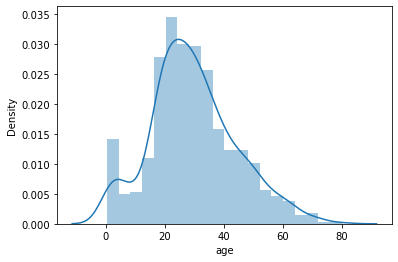

In [68]:
sns.distplot(df['age'])
plt.show()

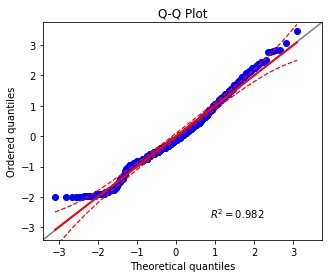

In [69]:
# normality test to check distribution
pg.qqplot(df.age, dist='norm');

In [70]:
normal, p = stats.normaltest(df.age.dropna())

# h0: X comes from normal distribution
# h1: X doesnt come from normal distribution
if p < 0.05:
    print('df.age doesnt come from normal distribution')
else:
    print('df.age comes from normal distribution')

df.age doesnt come from normal distribution


**Note:** karena `titanic.age` tidak terdistribusi secara normal, maka saya akan melakukan imputation pada kolom `age` menggunakan nilai median

## Embarked
check feature that has missing values

In [71]:
df.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [72]:
df[df['embarked'].isna() == True]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [73]:
pd.crosstab(index=df.embarked, columns=df.pclass, normalize=1)

pclass,1,2,3
embarked,,,
C,0.397196,0.092391,0.134420
Q,0.009346,0.016304,0.146640
S,0.593458,0.891304,0.718941


In [74]:
pd.crosstab(index=df.embarked, columns=df.sex, normalize=1)

sex,female,male
embarked,,
C,0.233974,0.164645
Q,0.115385,0.071057
S,0.650641,0.764298


## Impute Strategy:
- Age impute dengan median
- Embarked impute dengan S

## Feature Engineering (Name)

In [78]:
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [79]:
df['title'] = df['name'].str.split(',').str[1].str.split('.').str[0]
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [82]:
df['title'].nunique()

17

In [83]:
df['title'].unique

<bound method Series.unique of 0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
886      Rev
887     Miss
888     Miss
889       Mr
890       Mr
Name: title, Length: 891, dtype: object>

**Note**: kolom `title` akan di encode menggunakan binary encoder

## Ticket

In [86]:
df[['ticket']].head()

,ticket
0,A/5 21171
1,PC 17599
2,STON/O2. 3101282
3,113803
4,373450


In [85]:
df['ticket'].str.split().str[0]

0           A/5
1            PC
2      STON/O2.
3        113803
4        373450
         ...   
886      211536
887      112053
888       W./C.
889      111369
890      370376
Name: ticket, Length: 891, dtype: object

In [87]:
df['ticket'].str.split().str[1]

0        21171
1        17599
2      3101282
3          NaN
4          NaN
        ...   
886        NaN
887        NaN
888       6607
889        NaN
890        NaN
Name: ticket, Length: 891, dtype: object

In [88]:
df.drop(['ticket'], axis=1, inplace=True)

# EDA

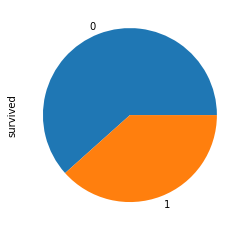

In [89]:
# check the target data balance
df['survived'].value_counts(normalize=True).plot(kind='pie')
plt.show()

C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\miniconda3\envs\ml_dl\lib\site-

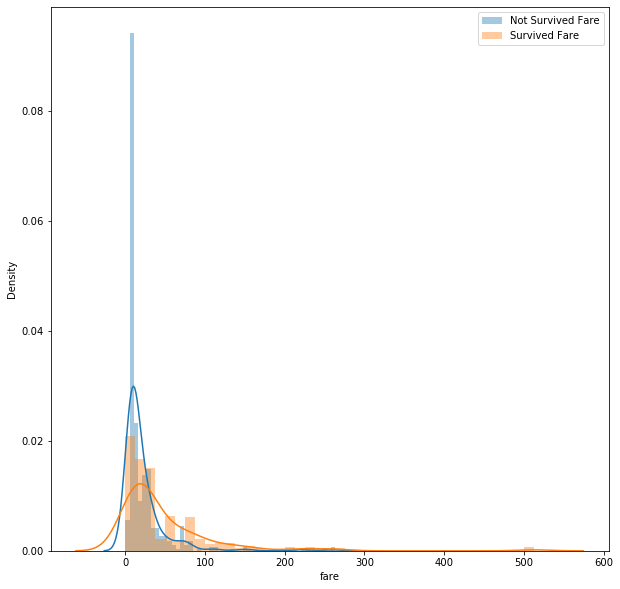

In [92]:
# survival based on fare
plt.figure(figsize=(10,10))
sns.distplot(df[df['survived'] == 0]['fare'], label='Not Survived Fare')
sns.distplot(df[df['survived'] == 1]['fare'], label='Survived Fare')

plt.legend()

plt.show()

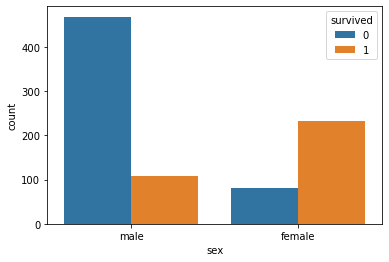

In [93]:
# survival based on gender
sns.countplot(x='sex', hue='survived', data=df)

plt.show()

In [94]:
pd.crosstab(index=df['sex'], columns=df['survived'], normalize=0)

survived,0,1
sex,,
female,0.257962,0.742038
male,0.811092,0.188908


In [96]:
# survival based on sibsp
df['sibsp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

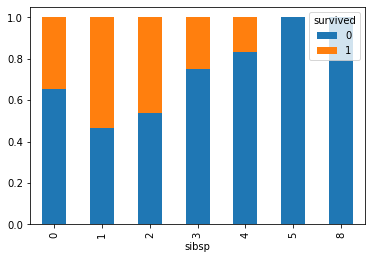

In [97]:
pd.crosstab(df['sibsp'], df['survived'], normalize=0).plot(kind='bar', stacked=True)
plt.show()

In [105]:
pd.crosstab(df['sibsp'], df['survived'], normalize=0)

survived,0,1
sibsp,,
0,0.654605,0.345395
1,0.464115,0.535885
2,0.535714,0.464286
3,0.750000,0.250000
4,0.833333,0.166667
5,1.000000,0.000000
8,1.000000,0.000000


In [104]:
# check survival based on number of sibsp
df[(df['sibsp']==1) & (df['survived']==1)]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,fare,embarked,title
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,Mrs
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,16.7000,S,Miss
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,31.3875,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,164.8667,S,Mrs
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,13.8583,C,Miss
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,11.1333,S,Master
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,52.5542,S,Mrs


In [106]:
df[(df['sibsp']==1) & (df['survived']==1)]['pclass'].value_counts()

1    53
2    32
3    27
Name: pclass, dtype: int64

C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\miniconda3\envs\ml_dl\lib\site-

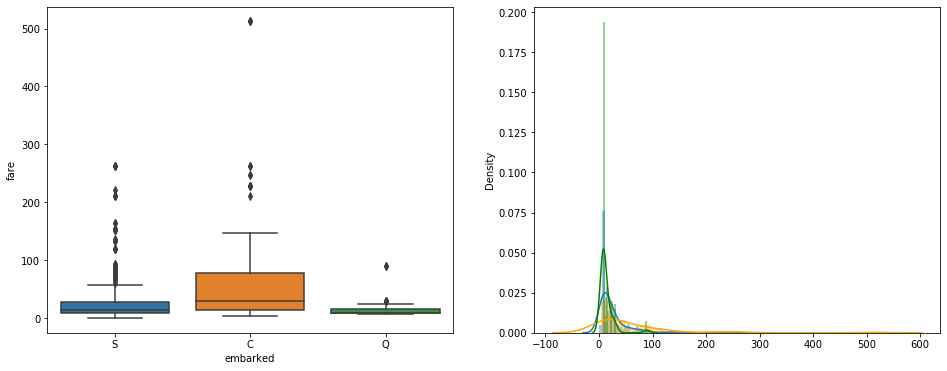

In [112]:
plt.figure(figsize=(16,6))

plt.subplot(121)
sns.boxplot(x='embarked', y='fare', data=df)

plt.subplot(122)
sns.distplot(x=df[df['embarked'] == 'S']['fare'], label='S')
sns.distplot(x=df[df['embarked'] == 'C']['fare'], label='C', color='orange')
sns.distplot(x=df[df['embarked'] == 'Q']['fare'], label='Q', color='green')

plt.show()

In [111]:
# mann-whitney U-test (t-test 2 sample versi non-parametrik)
stats, p = mannwhitneyu(df[df['embarked'] == 'S']['fare'], df[df['embarked'] == 'C']['fare'], alternative='less')

if p < 0.05:
    print('S median fare are less than Cherbrough')
else:
    print('S median fare are same as Cherbrough')
    
# hipotesis testing menggambarkan fenomena pada populasi dengan data sample

S median fare are less than Cherbrough


In [113]:
# mann-whitney U-test (t-test 2 sample versi non-parametrik)
stats, p = mannwhitneyu(df[df['embarked'] == 'Q']['fare'], df[df['embarked'] == 'C']['fare'], alternative='less')

if p < 0.05:
    print('Queenstown median fare are less than Cherbrough')
else:
    print('Queenstown median fare are same as Cherbrough')
    
# hipotesis testing menggambarkan fenomena pada populasi dengan data sample

Queenstown median fare are less than Cherbrough


In [115]:
# survival based on city
df[df['survived'] == 1]['embarked'].value_counts(normalize=True)

S    0.638235
C    0.273529
Q    0.088235
Name: embarked, dtype: float64

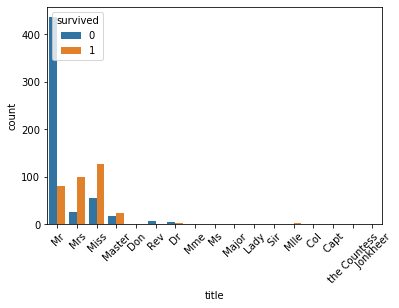

In [116]:
sns.countplot(x='title', hue='survived', data=df)
plt.xticks(rotation=45)
plt.show()

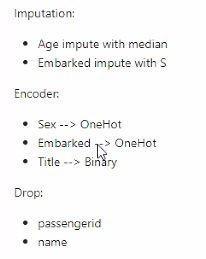

In [118]:
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,fare,embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [119]:
df.drop(['passengerid', 'name'], axis=1, inplace=True)

In [120]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


# Data Splitting

In [121]:
X = df.drop('survived', axis=1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y)

# Modelling Preparation
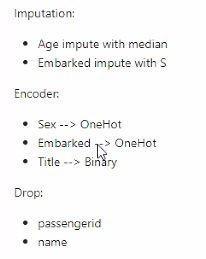

#### Pipeline

In [139]:
# Embarked Pipeline
pipe_embarked = Pipeline([
    ('impute', SimpleImputer(strategy='constant', fill_value='S')),
    ('onehot', OneHotEncoder(drop='first'))
])

transformer = ColumnTransformer([
    ('imputenum', SimpleImputer(strategy='median'), ['age']),
    ('onehot_embarked', pipe_embarked, ['embarked']),
    ('onehot_sex', OneHotEncoder(drop='first'), ['sex']),
    ('binary', ce.BinaryEncoder(), ['title'])
], remainder='passthrough')

# nama harus unik

#### Model Initializing

In [140]:
dtc = DecisionTreeClassifier(max_depth=10, min_samples_split=8, random_state=2021, class_weight='balanced')
rfe = RFE(estimator=dtc)

all_in_pipeline = Pipeline([
    ('transformer', transformer),
    ('rfe', rfe),
    ('clf', dtc)
])

#### Execute the Pipeline to get Initial Benchmark

In [141]:
all_in_pipeline.fit(X_train, y_train)

C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('imputenum',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='median',
                                                                verbose=0),
                                                  ['age']),
                                                 ('onehot_embarked',
                                                  Pipeline(memory=None,
       

In [142]:
y_pred = all_in_pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       110
           1       0.73      0.65      0.69        69

    accuracy                           0.77       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.77      0.77      0.77       179



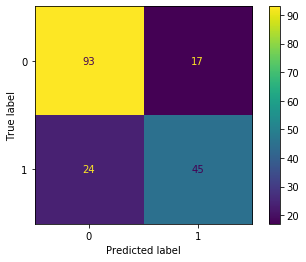

In [143]:
plot_confusion_matrix(all_in_pipeline, X_test, y_test);

- saya ingin fokus ke kedua kelas bisa bagus

### Get Feature After Feature Selection

In [165]:
all_in_pipeline.get_params()

{'memory': None,
 'steps': [('transformer',
   ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                     transformer_weights=None,
                     transformers=[('imputenum',
                                    SimpleImputer(add_indicator=False, copy=True,
                                                  fill_value=None,
                                                  missing_values=nan,
                                                  strategy='median', verbose=0),
                                    ['age']),
                                   ('onehot_embarked',
                                    Pipeline(memory=None,
                                             steps=[('impute',
                                                     SimpleImputer(add_indicator=False,
                                                                   copy=True,
                                                                   fill_...
               

In [155]:
# check used feature after rfe - city
all_in_pipeline[0].transformers_[1][1][1].get_feature_names()

array(['x0_Q', 'x0_S'], dtype=object)

In [158]:
# check used feature after rfe - title
all_in_pipeline[0].transformers_[3][1].get_feature_names()

['title_0', 'title_1', 'title_2', 'title_3', 'title_4']

In [161]:
# check used feature after rfe - sex
all_in_pipeline[0].transformers_[2][1].get_feature_names()

array(['x0_male'], dtype=object)

In [164]:
# check used feature after rfe - age
all_in_pipeline[0].transformers_[0][2]

['age']

In [168]:
# remainder yang dipakai
X_train.iloc[:,all_in_pipeline[0].transformers_[-1][-1]].columns

Index(['pclass', 'sibsp', 'parch', 'fare'], dtype='object')

In [169]:
all_in_pipeline[1].support_

array([ True, False, False,  True, False, False, False,  True, False,
        True,  True, False,  True])

# Modelling - Hyperparameter Tuning

In [171]:
hyperparam_space = {
    'clf__max_depth': [2,3,4,5,6,7],
    'clf__min_samples_split': [4,5,6,7,8,9,10],
    'clf__criterion': ['entropy', 'gini'],
    'rfe__n_features_to_select': [None,5,6,7,8],
    'transformer__imputenum__strategy': ['median', 'mean']
}

skf = StratifiedKFold(n_splits=5)

gridsearch = GridSearchCV(all_in_pipeline, hyperparam_space, scoring='roc_auc', n_jobs=-1, cv=skf)
gridsearch.fit(X_train, y_train)

C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('transformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('imputenum',
                                                                         SimpleImputer(add_indicator=False,
                                                                                       copy=True,
                                                                                       fill_value=None,
                                                                             

In [172]:
gridsearch.best_params_

{'clf__criterion': 'gini',
 'clf__max_depth': 3,
 'clf__min_samples_split': 4,
 'rfe__n_features_to_select': None,
 'transformer__imputenum__strategy': 'median'}

In [173]:
gridsearch.best_estimator_

Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('imputenum',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='median',
                                                                verbose=0),
                                                  ['age']),
                                                 ('onehot_embarked',
                                                  Pipeline(memory=None,
       

In [190]:
pd.DataFrame(gridsearch.cv_results_).sort_values('rank_test_score')  # dengan data X dan y yang sudah di training

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__criterion,param_clf__max_depth,param_clf__min_samples_split,param_rfe__n_features_to_select,param_transformer__imputenum__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
540,0.157335,0.024433,0.036010,0.004133,gini,3,9,None,median,"{'clf__criterion': 'gini', 'clf__max_depth': 3...",0.801756,0.867459,0.886625,0.896359,0.884891,0.867418,0.034127,1
531,0.140822,0.007737,0.038297,0.006956,gini,3,8,None,mean,"{'clf__criterion': 'gini', 'clf__max_depth': 3...",0.801756,0.867459,0.886625,0.896359,0.884891,0.867418,0.034127,1
530,0.150472,0.011948,0.031135,0.003872,gini,3,8,None,median,"{'clf__criterion': 'gini', 'clf__max_depth': 3...",0.801756,0.867459,0.886625,0.896359,0.884891,0.867418,0.034127,1
529,0.122638,0.011693,0.035799,0.005024,gini,3,7,8,mean,"{'clf__criterion': 'gini', 'clf__max_depth': 3...",0.801756,0.867459,0.886625,0.896359,0.884891,0.867418,0.034127,1
528,0.146397,0.013930,0.034671,0.009690,gini,3,7,8,median,"{'clf__criterion': 'gini', 'clf__max_depth': 3...",0.801756,0.867459,0.886625,0.896359,0.884891,0.867418,0.034127,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0.138156,0.018880,0.033827,0.010123,entropy,7,4,5,mean,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.755062,0.752066,0.843887,0.843119,0.799242,0.798675,0.040235,836
354,0.119343,0.015375,0.029206,0.004740,entropy,7,4,6,median,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.751240,0.750310,0.856844,0.813657,0.819024,0.798215,0.041498,837
350,0.200348,0.071215,0.035587,0.017124,entropy,7,4,None,median,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.751240,0.750310,0.856844,0.813657,0.819024,0.798215,0.041498,837
351,0.168109,0.022235,0.032410,0.004836,entropy,7,4,None,mean,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.755269,0.752066,0.838454,0.813657,0.819024,0.795694,0.035307,839


### Tuning

In [175]:
logit_tuned = gridsearch.best_estimator_.fit(X_train, y_train)
y_pred = logit_tuned.predict(X_test)

C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [176]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       110
           1       0.80      0.70      0.74        69

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.82      0.81       179



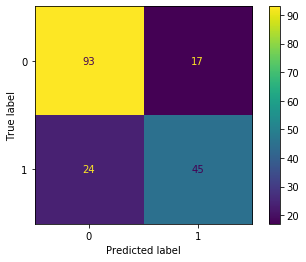

In [178]:
# before tuning
plot_confusion_matrix(all_in_pipeline, X_test, y_test);

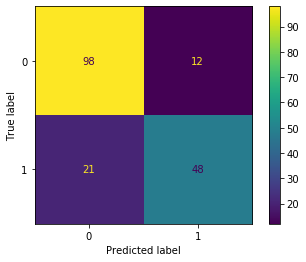

In [177]:
# after tuning
plot_confusion_matrix(logit_tuned, X_test, y_test);

Hasil tuning lebih jelek, sehingga kembali memakai initial model sebelum di tuning

In [ ]:
# roc auc fokus dua kelas
# pr curve fokus ke satu kelas

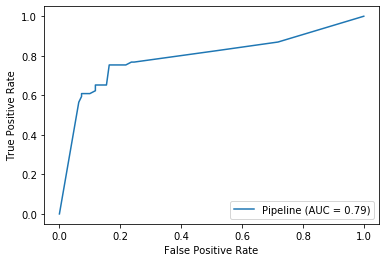

In [179]:
plot_roc_curve(all_in_pipeline, X_test, y_test);

# After Evaluation and Comparing Initial & Tuning Model

In [180]:
prob1 = all_in_pipeline.predict_proba(X_test)[:,1]
fpr, tpr, thr = roc_curve(y_test, prob1)
roc_df = pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'thr': thr})
roc_df

,fpr,tpr,thr
0,0.000000,0.000000,2.000000
1,0.063636,0.565217,1.000000
2,0.072727,0.594203,0.889384
3,0.072727,0.608696,0.865451
4,0.100000,0.608696,0.810898
5,0.118182,0.623188,0.762815
6,0.118182,0.652174,0.706924
7,0.145455,0.652174,0.681942
8,0.154545,0.652174,0.616573
9,0.163636,0.753623,0.445685


In [182]:
new_thr = 0.156506
y_pred0348 = np.where(all_in_pipeline.predict_proba(X_test)[:,1]>new_thr,1,0)
print(classification_report(y_test, y_pred0348))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79       110
           1       0.66      0.77      0.71        69

    accuracy                           0.76       179
   macro avg       0.75      0.76      0.75       179
weighted avg       0.77      0.76      0.76       179



# Predict and Deploy Preparation

In [184]:
import joblib

In [185]:
joblib.dump(all_in_pipeline, 'dtc')

['dtc']

In [186]:
dtc = joblib.load('dtc')

In [187]:
dtc

Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('imputenum',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='median',
                                                                verbose=0),
                                                  ['age']),
                                                 ('onehot_embarked',
                                                  Pipeline(memory=None,
       

In [188]:
X_train.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'title'], dtype='object')

# Predict Other Cases with the Model

In [189]:
rose = [[1, 'female', 17, 1, 1, 90, 'S', 'Miss']]
dtc.predict(pd.DataFrame(rose, columns=X_train.columns))

array([1], dtype=int64)

In [57]:
# df['name'][0].str.split(',')
# # df['name'][2].split(',')[1].split('.')[0]
# df['name'][2].split(',')[1].split('.')[0]

' Miss'

In [77]:
# title_list = []
# for i in df['name']:
#     x = i.split(',')[1].split('.')[0]
#     title_list.append(x)
    
# title_list

# df['title_name'] = title_list
# df